In [14]:
import numpy as np 
import pandas as pd 

#tree 관련 라이브러리 
from sklearn import tree 
from sklearn.tree import export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor

#성능 평가 라이브러리 
from sklearn.metrics import mean_squared_error

In [15]:
#k-fold cv 라이브러리 
from sklearn.model_selection import KFold

from sklearn.utils import shuffle

from sklearn.datasets import load_iris


# 의사결정나무 간단예제

In [16]:
x = [[0,0],[2,2]]
y = [0.5, 2.5]

#훈련
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x,y)

#평가 
clf.predict([[1,1]])

array([0.5])

# 의사결정나무 분류 예제(iris data)

In [17]:
iris = load_iris()

#x, y 분리
x_iris, y_iris = iris.data, iris.target

In [18]:
x_iris[:3], y_iris[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([0, 0, 0]))

In [19]:
#DecisionTree 객체 생성 

clf = tree.DecisionTreeClassifier(max_depth=2)

#훈련 
clf = clf.fit(x_iris, y_iris)

#test data로 예측
clf.predict([[5.6,2.4,4.1,1.1]])

array([1])

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

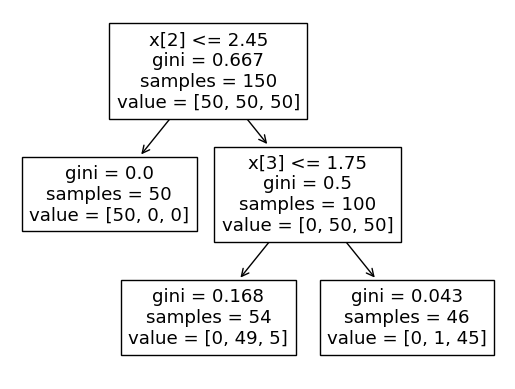

In [20]:
#시각화 
tree.plot_tree(clf)

In [21]:
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

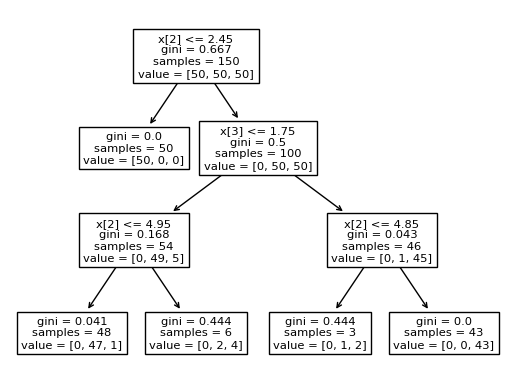

In [22]:
#Tree 깊이 조정 

clf = tree.DecisionTreeClassifier(max_depth=3)

#훈련 
clf = clf.fit(x_iris, y_iris)

#test data로 예측
clf.predict([[5.6,2.4,4.1,1.1]])

#시각화 
tree.plot_tree(clf)

In [23]:
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.5, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.3333333333333333, 0.3, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

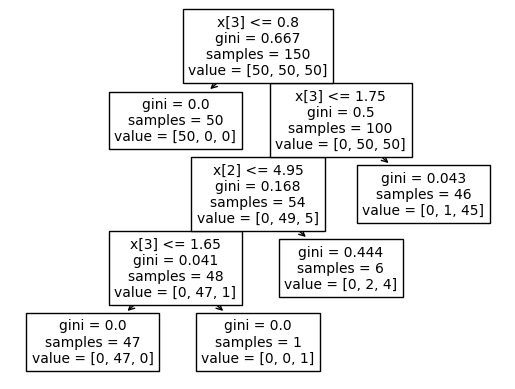

In [24]:
#pruning 방법(가지치기)으로 depth조정 

clf = tree.DecisionTreeClassifier(ccp_alpha=0.01)
#ccp_alpha=0.01 : 작을수록 규제가 적음

#훈련 
clf = clf.fit(x_iris, y_iris)

#test data로 예측
clf.predict([[5.6,2.4,4.1,1.1]])

#시각화 
tree.plot_tree(clf)

[Text(0.5, 0.5, 'gini = 0.667\nsamples = 150\nvalue = [50, 50, 50]')]

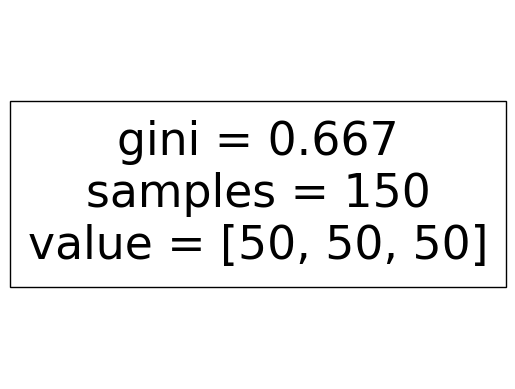

In [25]:
#pruning 방법(가지치기)으로 depth조정 

clf = tree.DecisionTreeClassifier(ccp_alpha=1)
#ccp_alpha=0.01 : 작을수록 규제가 적음

#훈련 
clf = clf.fit(x_iris, y_iris)

#test data로 예측
clf.predict([[5.6,2.4,4.1,1.1]])

#시각화 
tree.plot_tree(clf)

# ccp_alpha=1 >> 가지치기를 너무 많이 함 >> 학습이 제대로 안됨 

# boosting (iris data)

In [29]:
#데이터를 임의 섞기 

x_iris, y_iris = shuffle(x_iris, y_iris, random_state=42)
x_iris[:3], y_iris[:3]

(array([[5.8, 2.7, 5.1, 1.9],
        [5.7, 2.8, 4.5, 1.3],
        [5.7, 2.6, 3.5, 1. ]]),
 array([2, 1, 1]))

In [30]:
#train data / test data 구분

x_train, x_test = x_iris[:120], x_iris[120:]
y_train, y_test = y_iris[:120], y_iris[120:]

In [31]:
for n_trees in [1, 10, 50, 100]:
    clf = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=1.0, max_depth=1, random_state=42).fit(x_train, y_train)
    print(clf.score(x_test, y_test))

0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9


In [32]:
hitters = pd.read_csv('../../data/data자료/Hitters.csv')
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [33]:
hitters = shuffle(hitters, random_state=42)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
173,161,43,4,17,26,22,3,707,179,21,77,99,76,A,W,300,12,2,NaN,A
132,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,A,W,0,0,0,325.0,A
197,166,34,0,20,13,17,1,166,34,0,20,13,17,N,E,64,119,9,NaN,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A
104,397,114,23,67,67,53,13,5589,1632,241,906,926,716,A,E,244,2,4,NaN,A


In [34]:
hitters.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [35]:
hitters.dropna(subset='Salary', inplace=True)

In [36]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 132 to 102
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1)

# RandomForest(hitters data)

In [37]:
hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [38]:
n_fold = 5 

for t_param in ("sqrt", 5): #sqrt(p) (성능이 좋음)
    print('Number of features:', t_param)
    kf = KFold(n_splits=n_fold)
    idx = 1 
    
    sum_val_mse = 0 
    for train, val in kf.split(hitters):
        print('Fold:', idx)
        
        
        #train data의 feature 와 response 분리 
        train_x = hitters.iloc[train][['Hits', 'HmRun', 'Runs', 'Walks', 'Years']]
        train_y = hitters.iloc[train]['Salary']
        
        
        #validation의 feature 와 response 분리 
        val_x = hitters.iloc[val][['Hits', 'HmRun', 'Runs', 'Walks', 'Years']]
        val_y = hitters.iloc[val]['Salary']
        
        #random forest 객체 생성 
        rf = RandomForestRegressor(max_depth=3, max_features=t_param, random_state=42)
        rf.fit(train_x, train_y)
        
        #val 이용 에측
        val_y_pred = rf.predict(val_x)
        
        #val MSE
        val_mse = mean_squared_error(val_y, val_y_pred)
        print("Val_MSE:", val_mse)
        
        #val MSE 합계
        sum_val_mse += val_mse 
        
        print('--'* 100)
        idx += 1 
    print('Average of val MSE: %.3f' %(sum_val_mse / n_fold))
    print('--'* 100)
    
    

Number of features: sqrt
Fold: 1
Val_MSE: 107304.89922793947
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fold: 2
Val_MSE: 110416.95433495035
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fold: 3
Val_MSE: 91403.57659806345
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fold: 4
Val_MSE: 119158.22048619596
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fold: 5
Val_MSE: 105123.6195